In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('training_set_values.csv')
test = pd.read_csv('test_values-Copy1.csv')

In [4]:
test_ids = pd.DataFrame(data=test['id'])

In [5]:
#Concatinating the test and train values together to avoid repetition of data cleaning
train = pd.concat([train,test])

In [6]:
train.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


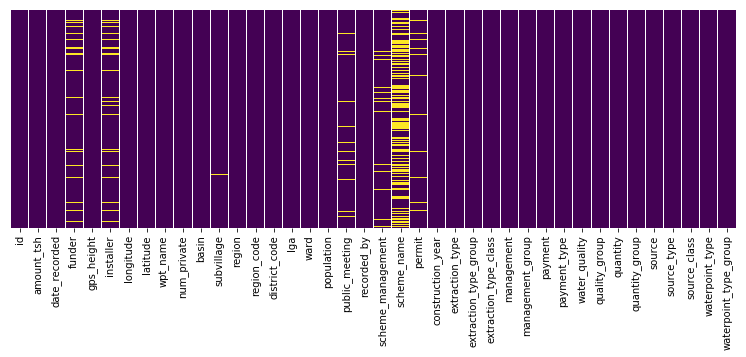

In [7]:
plt.figure(figsize=(13,4))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

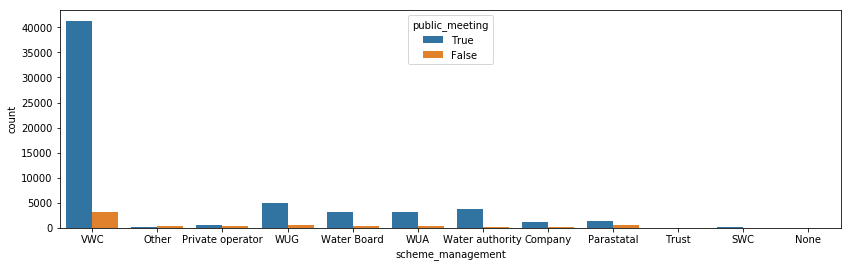

In [8]:
plt.figure(figsize=(14,4))
sns.countplot(x='scheme_management',data=train,hue='public_meeting')

In [9]:
train['public_meeting'] = train['public_meeting'].fillna(True)
train['permit'] = train['permit'].fillna(True)

In [10]:
def fill_scm(cols):
    pub_meet = cols[0]
    scheme_mgt = cols[1]
    permit = cols[2]
    
    if pd.isnull(scheme_mgt):
        if (pub_meet | permit) is True:
            return 'VWC'
        else:
            return 'WUG'
    else:
        return scheme_mgt

In [11]:
#Replacing NAN values with VWC OR WUG(most frequent groups)
train['scheme_management'] = train[['public_meeting','scheme_management','permit']].apply(fill_scm,axis=1)

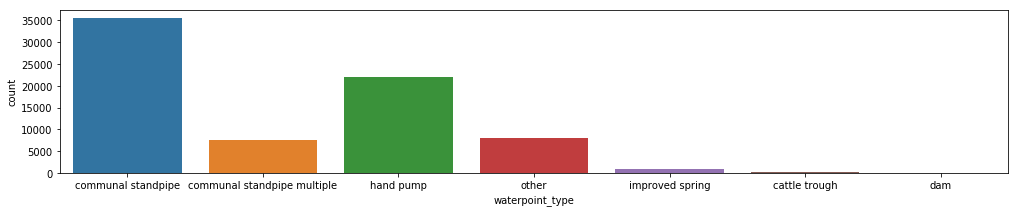

In [12]:
plt.figure(figsize=(17,3))
sns.countplot(x='waterpoint_type',data=train)

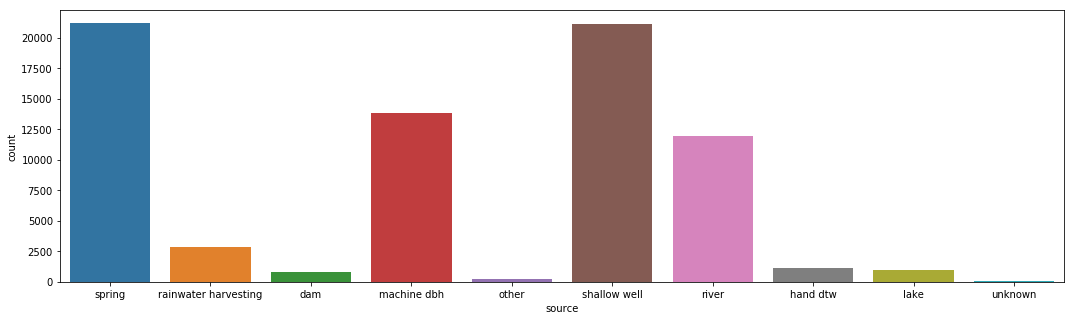

In [13]:
plt.figure(figsize=(18,5))
sns.countplot(x='source',data=train)

In [14]:
def time_range(cols):
    year_recorded = int(cols[0][:4])
    construct_year = int(cols[1])
    time_interval = year_recorded - construct_year
    if time_interval == year_recorded:
        return 0
    else:
        return time_interval

In [15]:
train['time_interval'] = train[['date_recorded','construction_year']].apply(time_range,axis=1)

In [16]:
train.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,time_interval
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,12
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3


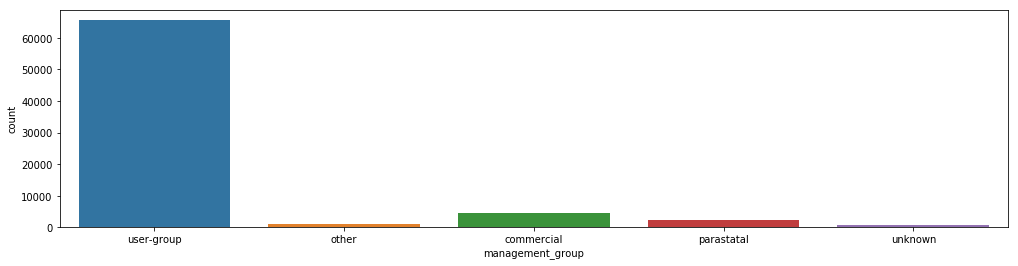

In [17]:
plt.figure(figsize=(17,4))
sns.countplot(x='management_group',data=train)

In [18]:
train['waterpoint_type_group'].value_counts()

communal standpipe    43239
hand pump             21884
other                  8010
improved spring         959
cattle trough           150
dam                       8
Name: waterpoint_type_group, dtype: int64

In [19]:
cols = ['installer','basin','subvillage','construction_year','funder','lga','ward','recorded_by',
        'scheme_name','date_recorded','extraction_type_class','management_group','payment_type',
        'waterpoint_type_group','quantity_group','wpt_name','source_type','public_meeting',
        'permit','region','id']

In [20]:
#Dropping columns that won't be useful in the prediction
train = train.drop(cols,axis=1)

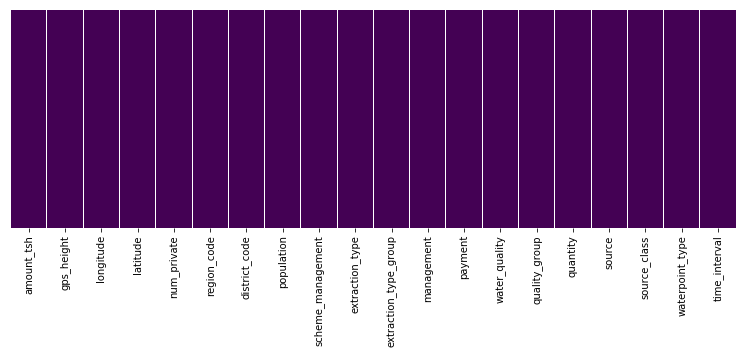

In [21]:
plt.figure(figsize=(13,4))
sns.heatmap(data=train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74250 entries, 0 to 14849
Data columns (total 20 columns):
amount_tsh               74250 non-null float64
gps_height               74250 non-null int64
longitude                74250 non-null float64
latitude                 74250 non-null float64
num_private              74250 non-null int64
region_code              74250 non-null int64
district_code            74250 non-null int64
population               74250 non-null int64
scheme_management        74250 non-null object
extraction_type          74250 non-null object
extraction_type_group    74250 non-null object
management               74250 non-null object
payment                  74250 non-null object
water_quality            74250 non-null object
quality_group            74250 non-null object
quantity                 74250 non-null object
source                   74250 non-null object
source_class             74250 non-null object
waterpoint_type          74250 non-null object


In [23]:
scheme_mgt = pd.get_dummies(train['scheme_management'],drop_first=True)
ext = pd.get_dummies(train['extraction_type'],drop_first=True)
ext_g = pd.get_dummies(train['extraction_type_group'],drop_first=True)
pay = pd.get_dummies(train['payment'],drop_first=True)
mgt = pd.get_dummies(train['management'],drop_first=True)
wt_q = pd.get_dummies(train['water_quality'],drop_first=True)
qty_g = pd.get_dummies(train['quality_group'],drop_first=True)
qty = pd.get_dummies(train['quantity'],drop_first=True)
src = pd.get_dummies(train['source'],drop_first=True)
src_cls = pd.get_dummies(train['source_class'],drop_first=True)
wt_type = pd.get_dummies(train['waterpoint_type'],drop_first=True)

In [24]:
dum_cols = [train,ext,ext_g,pay,wt_q,qty_g,mgt,src_cls,qty,src,wt_type,scheme_mgt]

In [25]:
train = pd.concat(dum_cols,axis=1)

In [26]:
drp_cols = ['extraction_type','extraction_type_group','payment','water_quality','management',
           'quality_group','quantity','source','source_class','waterpoint_type',
            'scheme_management']

In [27]:
train = train.drop(drp_cols,axis=1)

In [28]:
train.head(2)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,time_interval,cemo,...,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,12,0,...,0,0,0,0,0,1,0,0,0,0
1,0.0,1399,34.698766,-2.147466,0,20,2,280,3,0,...,1,0,0,0,0,0,0,0,0,0


In [29]:
X_train = train[:59400]

In [30]:
X_test = train[59400:]

In [31]:
label = pd.read_csv('test_labels.csv')

In [32]:
X_test.head(2)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,time_interval,cemo,...,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority
0,0.0,1996,35.290799,-4.059696,0,21,3,321,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0.0,1569,36.656709,-3.309214,0,2,2,300,13,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
label['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [37]:
def conv_binary(col):
    if col == 'functional':
        return 0
    elif col == 'functional needs repair':
        return 1
    else:
        return 2

In [38]:
label['status_group'] = label['status_group'].apply(conv_binary)

In [39]:
X_train = pd.concat([X_train,label['status_group']],axis=1)

In [40]:
X_train.head()

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,time_interval,cemo,...,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority,status_group
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,12,0,...,0,0,0,0,1,0,0,0,0,0
1,0.0,1399,34.698766,-2.147466,0,20,2,280,3,0,...,0,0,0,0,0,0,0,0,0,0
2,25.0,686,37.460664,-3.821329,0,21,4,250,4,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,263,38.486161,-11.155298,0,90,63,58,27,0,...,0,0,0,0,1,0,0,0,0,2
4,0.0,0,31.130847,-1.825359,0,18,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [41]:
x_train = X_train.drop(['status_group'],axis=1)

In [42]:
y_train = pd.DataFrame(data=X_train['status_group'])

In [43]:
x_train.head(1)

,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,time_interval,cemo,...,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority
0,6000.0,1390,34.938093,-9.856322,0,11,5,109,12,0,...,0,0,0,0,0,1,0,0,0,0


In [44]:
y_train.head(1)

,status_group
0,0


In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [48]:
logmodel.fit(x_train,y_train)

C:\Users\Betiku Oluwatobi\Anaconda2\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
predictions = logmodel.predict(X_test)

In [79]:
submission = pd.DataFrame(data=predictions,columns=['status_group'])

In [80]:
submission.head(1)

,status_group
0,2


In [74]:
def conv_str(col):
    if col == 0:
        return 'functional'
    elif col == 1:
        return 'functional needs repair'
    else:
        return 'non functional'

In [81]:
submission['status_group'] = submission['status_group'].apply(conv_str)

In [83]:
result = pd.concat([test_ids,submission],axis=1)

In [85]:
result['status_group'].value_counts()

functional                 10352
non functional              4477
functional needs repair       21
Name: status_group, dtype: int64

In [87]:
result.to_csv('results',index=False)